# Data Exploration

## importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import os

## importing data

In [9]:
raw_path = os.path.join(os.path.pardir,'data','raw')
train_file = os.path.join(raw_path,'train.csv')
test_file = os.path.join(raw_path,'test.csv')

In [10]:
train_df = pd.read_csv(train_file,index_col = 'PassengerId')
test_df = pd.read_csv(test_file,index_col = 'PassengerId')

## high-level analysis

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [13]:
test_df['Survived']=-4

In [15]:
full_df = pd.concat((test_df,train_df),axis=0)

In [65]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
 10  Survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [17]:
full_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,-4
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,-4
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,-4
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,-4
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,-4


In [18]:
full_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,1
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,0
890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,1
891,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0


In [22]:
m_passengers = full_df.loc[full_df.Sex == 'male',:]
f_passengers = full_df.loc[full_df.Sex == 'female',:]
m_passengers_f_class = full_df.loc[((full_df.Sex == 'male') & (full_df.Pclass ==1)),:]
f_passengers_f_class = full_df.loc[((full_df.Sex == 'male') & (full_df.Pclass ==1)),:]

In [29]:
print('Male passengers:' + str(len(m_passengers)))
print('Female passengers:' + str(len(f_passengers)))
print('Male first class passengers:' + str(len(m_passengers_f_class)))
print('Female first class passengers:' + str(len(f_passengers_f_class)))

Male passengers:843
Female passengers:466
Male first class passengers:179
Female first class passengers:179


## Statistical Analysis

In [31]:
full_df.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,29.881138,0.498854,0.385027,33.295479,-1.016043
std,0.837836,14.413493,1.041658,0.865560,51.758668,2.083623
min,1.000000,0.170000,0.000000,0.000000,0.000000,-4.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,-4.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [41]:
print('Mean fare: '+ str(full_df.Fare.mean()))
print('Median fare: '+ str(full_df.Fare.median()))
print('Min fare: '+ str(full_df.Fare.min()))
print('Max fare: '+ str(full_df.Fare.max()))
print('Fare range: '+ str(full_df.Fare.max()-full_df.Fare.min()))
print('25 percentile: '+ str(full_df.Fare.quantile(.25)))
print('50 percentile: '+ str(full_df.Fare.quantile(.50)))
print('75 percentile: '+ str(full_df.Fare.quantile(.75)))
print('Variance fare: '+ str(full_df.Fare.var()))
print('Standard deviation fare: '+ str(full_df.Fare.std()))

Mean fare: 33.295479281345585
Median fare: 14.4542
Min fare: 0.0
Max fare: 512.3292
Fare range: 512.3292
25 percentile: 7.8958
50 percentile: 14.4542
75 percentile: 31.275
Variance fare: 2678.959737892895
Standard deviation fare: 51.758668239174156


<AxesSubplot:>

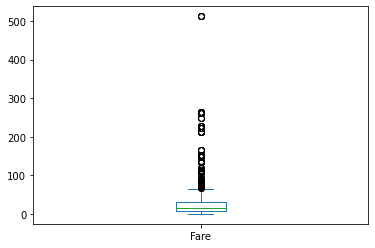

In [42]:
full_df.Fare.plot(kind='box')

In [44]:
full_df.describe(include='all')

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
count,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,1309.000000
unique,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,NaN
top,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,NaN
freq,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,NaN
mean,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN,-1.016043
std,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN,2.083623
min,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,-4.000000
25%,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,-4.000000
50%,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000
75%,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,1.000000


In [45]:
full_df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [46]:
full_df.Sex.value_counts(normalize=True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [51]:
full_df[full_df.Survived != -4].Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [52]:
full_df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

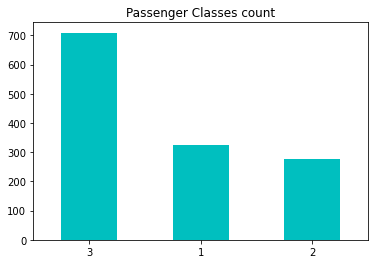

In [62]:
full_df.Pclass.value_counts().plot(kind='bar',rot = 0, title='Passenger Classes count',color='c');

## Distributions

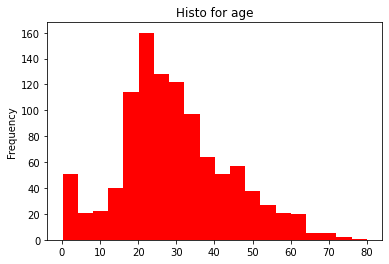

In [68]:
full_df.Age.plot(kind='hist',title='Histo for age',color='r',bins=20);

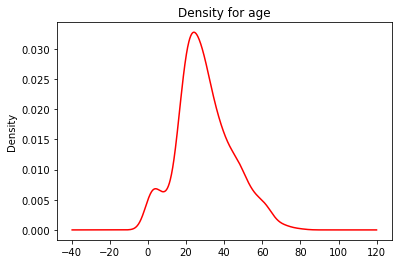

In [70]:
full_df.Age.plot(kind='kde',title='Density for age',color='r');

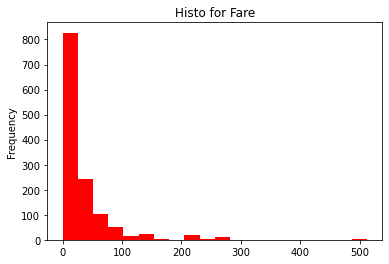

In [71]:
full_df.Fare.plot(kind='hist',title='Histo for Fare',color='r',bins=20);

In [73]:
print('Skewness age: '+ str(full_df.Age.skew()))
print('Skewness Fare: '+ str(full_df.Fare.skew()))

Skewness age: 0.40767455974362266
Skewness Fare: 4.367709134122921
